# Capture for Ximea Cameras

https://www.ximea.com/support/wiki/apis/XiAPI_Manual

In [1]:
import ximea_cam_aquire_save as aquire
import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

## Bulk Collection

In [2]:
#settings:
num_frames = 10
cam_exposure = 1000
cam_gain = 20

In [3]:
imp.reload(aquire)
aquire.aquire_save_fullset(num_frames=num_frames, verbose=True, cam_exposure=cam_exposure, cam_gain=cam_gain)


Opening first camera...
Exposure is set to 1001 us = 1.001 ms
Gain is set to 20.0
Mode is set to XI_ACQ_TIMING_MODE_FREE_RUN
Framerate is set to 1000.0 fps
Data format is set to XI_RAW8
Starting data acquisition of 10 frames...**********
Effective Speed: 332.15 FPS
Stopping acquisition...
Saving data...**********Done!
Done.


()

In [6]:
ims = []
for i in range(num_frames):
    imb = []
    with open(f'capture/batch/data_raw_bytes_{i}.bin', 'rb') as f:
        byte = f.read(1)
        while(byte):
            byte = f.read(1)
            imb.append(int.from_bytes(byte,'big'))
        ims.append(np.array(imb).reshape((1544,2064)))
        #ims.append(np.array(imb).reshape((1544,2064)))
        #ims.append(np.array(map('|S1',list(imb))).reshape((1544,2064)))
        f.close()
for i in range(len(ims)):
    ims[i] = cv2.cvtColor(np.uint8(ims[i]), cv2.COLOR_BayerGR2RGB)
    imageio.imwrite(f'capture/batch/img_{i}.jpg', ims[i])

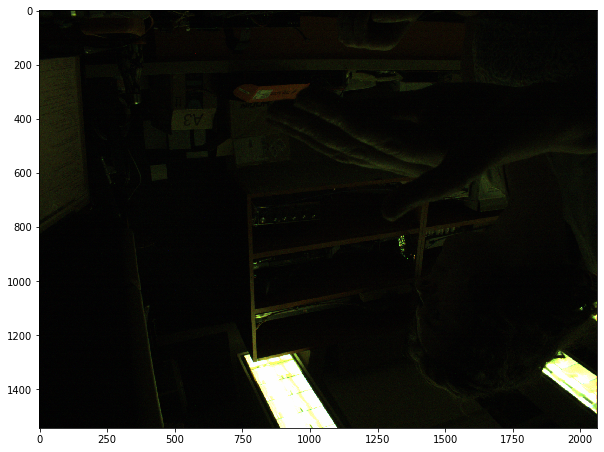

In [7]:
im = ims[0]
#im = cv2.cvtColor(np.uint8(im), cv2.COLOR_BayerGR2RGB)
plt.figure(figsize=(10,12))
plt.imshow(im)

In [14]:
from datetime import datetime
from PIL import Image
#import time
 
def imgDate(fn):
    "returns the image date from image (if available)\nfrom Orthallelous"
    std_fmt = '%Y:%m:%d %H:%M:%S.%f'
    # for subsecond prec, see doi.org/10.3189/2013JoG12J126 , sect. 2.2, 2.3
    tags = [(36867, 37521),  # (DateTimeOriginal, SubsecTimeOriginal)
            (36868, 37522),  # (DateTimeDigitized, SubsecTimeOriginal)
            (306, 37520), ]  # (DateTime, SubsecTime)
    exif = Image.open(fn)._getexif()
 
    for t in tags:
        dat_stmp = exif.get(t[0])
        sub_stmp = exif.get(t[1], 0)
 
        # PIL.PILLOW_VERSION >= 3.0 returns a tuple
        dat_stmp = dat_stmp[0] if type(dat_stmp) == tuple else dat_stmp
        sub_stmp = sub_stmp[0] if type(sub_stmp) == tuple else sub_stmp
        if dat_stmp != None: break
 
    if dat_stmp == None: return None
    full = '{}.{}'.format(dat_stmp, sub_stmp)
    T = datetime.strptime(full, std_fmt)
    T = time.mktime(time.strptime(dT, '%Y:%m:%d %H:%M:%S')) + float('0.%s'%sub)
    return T

In [21]:
Image.open('capture/batch/img_0.jpg')[36867]

TypeError: 'JpegImageFile' object does not support indexing